# Directed Hamiltonian Cycle Problem (DHCP)

## Notation

let $G=(V,E)$ be a graph where $V=\{v_1,v_2,\ldots,v_n\}$ is a set of vertices, and $E=\{e_1,e_2,\ldots,e_m\}$ a set of edges, where $e_l$ is an ordered pair $(v_i,v_j)$ , $n$ is the number of vertices (the size of the graph), $m$ is the number of edges

A **cycle** in the graph takes the form:
$$
(v_0,e_1,v_1,e_2,\ldots,e_k,v_0)
$$
where $k\geq1$, and $v_i$ for $i=0,1,\ldots,k-1$ are all distinct

the integer $k$ is the length of the **cycle**

a cycle is hamiltonian is if the cycle's length $k$ is equal to $n$ the number of nodes in the graph: $k=n$

$p$ is the probability of the existence of an edge in a graph

(Fournier 2010: 31)

## Definition of the problem

* **Decisional DHCP**:

    Given a directed graph $G=(V,E)$ decide if $G$ contains a **Hamiltonian Cycle**
    
    * Complexity class: NP-Complete.



* **Computational/Search DHCP**:

    if G has a hamiltonian cycle, then find it.
    
    * Complexity class: NP-Complete


* ** Optimization DHCP**:

    Given a Directed Graph $G(V,E)$, maximize or minimize a certain value in a given cycle.
    
    * Complexity class: NP-Hard
    
(Garey and Johnson 1979)

## Testing methodology

* **Exhaustive search**:
   Measuring the average time to decide instances with increasing $n$ and constant edge existence probability $p$.
    
    
* **Greedy and meta-heuristics**:
   Minimize the use of **fictitious** edges in a given cycle, and compare the peformance of both methods on the same graphs with increasing $n$, and fixed edge probability $p$.
    
    
* **Special cases**:
    Generate random instances of graphs, then check if the graph generated is one of the special cases.
    


### Random instances sampling strategy

Random graphs will be generated using the Erdos-Renyi model (Erdos and Renyi 1959), in particular the G(n,p) model.

The model samples a random graph with a given size $n$ and edge existence probability $p$ uniformly at random, with **all** graphs of a given $n$ and a given $p$ equally likely to be sampled.

After generating a random graph instance of a certain size and edge probability, to generate a **Yes** instance, a random permutation of size $n$ vertices is sampled, with all the permutations equally likely, then the last vertex is connected to the first, then the permutation is added to the graph.

## Code

Importing the relevant libraries

In [7]:
import networkx as nx
from time import time
from math import exp

from random import uniform
from random import randint

import numpy as np
from scipy.optimize import curve_fit
from scipy.special import factorial

import matplotlib.pyplot as plt
%matplotlib inline

## Random Graph construction function

In [8]:
def random_graph(n,p):
    '''
    this function take a number n: the number of nodes
    and p: the probability of the existence of an edge or not
    with all edges are equally likely
    '''
    
    #creating a directed graph G
    G=nx.DiGraph()
    #filling it with nodes from 0 to n
    nodes=[i for i in range(n)]
    G.add_nodes_from(nodes)
    #looping over all all the nodes twice, and at every possible edge between two nodes, i draw a random number
    #in the range from 0-1 using uniform(0,1) and if that number is less than p, we add that edge to the graph
    #
    for i in range(n):
        for j in range(n):
            if uniform(0,1)<p and i!=j:
                G.add_edge(i,j)
    return G

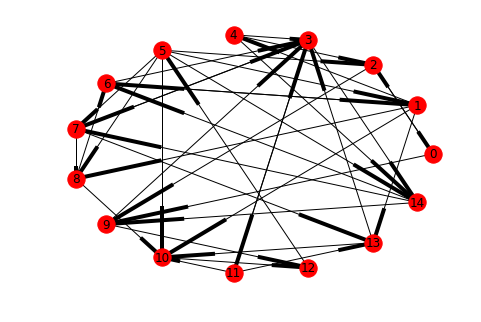

In [9]:
#a graph with medium value for p (medium connectivity of edges)
G=random_graph(15,0.2)
nx.draw_circular(G,with_labels=True)

## Functions for injecting and detecting hamiltonian cycles



In [10]:
def add_hamiltonian_cycle(G):
    '''
    adds a hamiltonian cycle by drawing a random permutation
    '''
    p=np.random.permutation(len(G))
    p=np.append(p,p[0])
    for i in range(1,len(p)):
        G.add_edge(p[i-1],p[i])    
    return p


# Solution Methods

## Exact methods -- Exhaustive search

Traverses every possible path in a given Graph from a start node
,keeping a separate stack of every path.

Whenever it encounters a cycle, it checks it's size to see if its hamiltonian, and returns True if it is. otherwise it returns False after examining all possible paths.

There are $n!$ worst case possible hamiltonian cycles in a complete graph.
So this algorithm costs $$O(n!).$$

**Pseudo-code:**


**for** all neighbors of current node **do**:

>**if** neighbor was visited before on the current path:

>>**if** length of the path **is** n:

>>> **return True**

>**else**:
>>push neighbor and it's to the stack

>pop the stack

**return False **

In [11]:
def exhaustive_search_for_hamiltonian(G,start):
    '''
    detects the existence of a hamiltonian cycle using depth first search,
    by looking at all possible paths through the graph starting from a given node
    '''
    paths_and_parents=[]
    current_path=[start]
    current_parents={start:None}
    paths_and_parents.append((current_path,current_parents))
    
    while len(paths_and_parents)>0:
        current_path,current_parents=paths_and_parents.pop()
        current_node=current_path.pop()
        for neighbor in list(G.neighbors(current_node)):
            if not neighbor in current_parents:
                parents_=dict(current_parents)
                path_=list(current_path)
                parents_[neighbor]=current_node
                path_.append(neighbor)
                paths_and_parents.append((path_,parents_))
            if neighbor in current_parents:
                #cycle found, check if it's hamiltonian
                if len(current_parents)==len(G):
                    return True
    return False


In [12]:
add_hamiltonian_cycle(G)

array([ 2,  4,  6,  7,  9, 13,  1,  0, 10, 12, 14,  3,  8,  5, 11,  2])

## Evaluation

In [47]:
pnts_n = []
pnts_t = []
def time_Exhaustive():
    # test exhaustive search
    print("n\tExhaustive" ) # header
    max_repeats = 300
    n  = 14
    t0 = t1 = 0
    while t1-t0<60: # in seconds; if it takes too long then stop testing
        t0 = time()
        for repeats in range(max_repeats): # e.g. average over many instances
            G=random_graph(n,.15)
            add_hamiltonian_cycle(G)
            exhaustive_search_for_hamiltonian(G,0)
            
        t1 = time()
        # record average time
        print( str(n)+"\t"+str((t1-t0)/max_repeats) )
        pnts_n.append( n )
        pnts_t.append( (t1-t0)/max_repeats )
        n += 1
time_Exhaustive()

n	Exhaustive
14	0.0006149633725484212
15	0.0007753952344258626
16	0.0019184343020121257
17	0.0014054059982299804
18	0.0035661466916402183
19	0.008380613327026366
20	0.014135908285776775
21	0.04373626470565796
22	0.0776843269666036
23	0.02727285385131836
24	0.4757329344749451


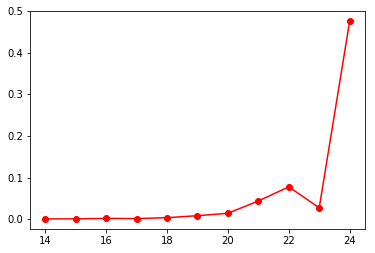

In [48]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

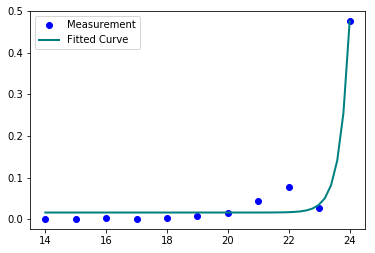

In [49]:
def func(x, a,b):
    return a*(factorial(x) ) + b

popt, pcov = curve_fit(func, pnts_n, pnts_t,maxfev=100000)

x = pnts_n
y = pnts_t
plt.figure()
plt.plot(x, y, 'bo', label="Measurement")
xx = np.linspace(pnts_n[0],pnts_n[-1],50)
plt.plot(xx, func(xx, *popt), 'r-', linewidth=2, color='teal', label="Fitted Curve")
plt.legend(loc='best')
plt.show()

## Discussion

Exhaustive search is very slow and impractical for larger graphs.

but it is useful when $n$ is small.

## Greedy

Using the **fictitious edges** method to complete the graph, giving original edges weights equal to 1 and fictitious edges weights equal 5, and using TSP greedy heuristic of tour construction that sorts all the outgoing edges everytime according to weight, and trying all different start nodes which has complexity:
    $$O(n^3lg_2(n))$$
 assuming the use of a $nlgn$ sorting algorithm

(Nilsson 2003)

**Pseudo code:**

**for** all possible start nodes **do**:
>Sort all edges according to weight.

>Select the cheapest edge and add it to our tour

>Stop if we have N edges in the tour

**return** cheapest tour

# Code

Completing the graph with "**fictitious edges**", giving them weights = 5, the plan is to minimize the use of them

In [23]:
def complete_fictitious(G):
    #sets the weights for the original edges to 1, and completes the graph with fictitious
    #with weights equal to 5
    for src_node in G:
        for dest_node in G[src_node]:
            G[src_node][dest_node]['weight']=1
    for i in range (len(G)):
        for j in range(len(G)):
            if i!=j:
                if j not in G[i]:
                    G.add_edge(i,j,weight=5)

#### Greedily constructs a tour, sorting the remaining vertices each time and picks the next vertex by minimum weight

In [24]:
def greedy(G,start):
    #tour starts with the start node
    tour=[start]
    current_node=start
    while(True):
        #nodes sorted by edge weights
        edges=sorted(G.adj[current_node],key=lambda x:G.adj[current_node][x]['weight'])
        #edges are the current node's neighboring vertices , which include fictitous and non-fictitious connections
        for i in range(len(edges)):
            #loop over the neighboring vertices in sorted order, if a vertex was already in the tour skip it,
            #otherwise add it to the tour and update the current node to be the last vertex added
            if edges[i] not in tour:
                tour.append(edges[i])
                current_node=tour[-1]
                #break out of the for loop
                break
        if len(tour)==len(G):
            #if the tour is complete, connect the ending vertex to the start and return the tour
            tour.append(start)
            return tour


#### Evaluates the cost of a given tour

In [25]:
def evaluate_cost(G,soln):
    #takes complete graphs with weights, and evaluates the cost by summing the weights
    return sum([G.adj[soln[i]][soln[i+1]]['weight'] for i in range(0,len(G))])

#### This function tries all start nodes, and returns the minimum cost greedy tour and its cost

In [26]:
def min_greedy_tour(G):
    #evaluates the cost of all greedy tours (trying all nodes as start node)
    #returns the minimum costs tour and its costs at each step
    tours_and_costs=[]
    for i in range(len(G)):
        tours_and_costs.append( (greedy(G,i) , evaluate_cost(G,greedy(G,i))) )
    return min(tours_and_costs,key=lambda x:x[1])

## Evaluation

In [27]:
pnts_n = []
pnts_t = []
def time_greedy():
    # test greedy tour construction
    print("n\tGreedy" ) # header
    max_repeats = 300
    n  = 14
    t0 = t1 = 0
    while t1-t0<15:  #in seconds; if it takes too long then stop testing
        t0 = time()
        for repeats in range(max_repeats): # e.g. average over many instances
            G=random_graph(n,0.15)
            add_hamiltonian_cycle(G)
            complete_fictitious(G)
            min_greedy_tour(G)
            
        t1 = time()
        # record average time
        print( str(n)+"\t %.3f"% ((t1-t0)/max_repeats) )
        pnts_n.append( n )
        pnts_t.append( (t1-t0)/max_repeats )
        n += 1
time_greedy()

n	Greedy
14	 0.014
15	 0.017
16	 0.022
17	 0.026
18	 0.033
19	 0.035
20	 0.044
21	 0.049
22	 0.054


### Fitting a $n^3 log(n)$ curve to the points

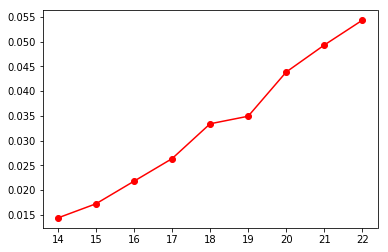

In [28]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

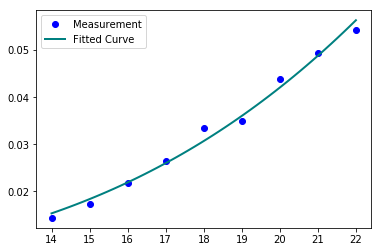

In [29]:
def func(x, a,b):
    return a*(x**3)*np.log2(x) + b

popt, pcov = curve_fit(func, pnts_n, pnts_t,maxfev=100000)

x = pnts_n
y = pnts_t
plt.figure()
plt.plot(x, y, 'bo', label="Measurement")
xx = np.linspace(pnts_n[0],pnts_n[-1],50)
plt.plot(xx, func(xx, *popt), 'r-', linewidth=2, color='teal', label="Fitted Curve")
plt.legend(loc='best')
plt.show()

## Discussion

Greedy algorithm exhibits polynomial running time, and provides approximations around 90% accurate.


## Meta-heuristics: Simulated-annealing

Simulated-annealing algorithm mimics the heating and slow cooling of metals to form crystals, taking inspiration from physics.

This meta-heuristic allows probabilistically transitioning to a worse state, with higher probability of a transition to a worse state at the early stages(higher temperatures), then the probability(temperature) gradually decrease, while keeping track of the best solution encountered.

The algorithm depends linearly on $n$, since all cost evaluations are done independently, and each evaluation is O(n), but the constant is relatively big compared to the greedy algorithm
So this algorithm costs $$O(n).$$
(Brownlee 2011: 170)

**Pseudo-code**:

start_solution $\gets $random_initial_solution(problem_size)

best_solution $\gets$ start_solution

temperature $\gets$ temperature_init

**for** i in range(max_iterations):

>**if** **i** $\%$ temp_decrease is 0:

>>decrease temp

>candidate_solution $\gets$ perturb_solution(current_solution)

>**if** cost(candidate_solution) < cost(current_solution):

>>current_solution $\gets$ candidate_solution

>> **if** cost(current_solution)<cost(best_solution):

>>> best_solution $\gets$ current_solution

>**else**:

>> **if** transition_probability(current_state) > Rand():
>>> current_solution $\gets$ candidate_solution

**end**

**return** best_solution

In [25]:
def random_soln(n):
    '''
    to generate initital random solution for SA
    '''
    p=list(np.random.permutation(n))
    p.append(p[0])
    return p

In [3]:
def perturb_soln(soln,n):
    '''
    works and functional, awesome
    '''
    copy=list(soln)
    #takes a solution (hamiltonian cycle) and a number n, and perturbs the solution by switches n pairs of nodes
    #and returns the perturbed solution
    #RENAME THE VARIABLES TO MAKE SENSE
    x=[randint(0,len(soln)-2) for i in range(n)]
    y=[randint(0,len(soln)-2) for i in range(n)]
    
    for i in range(n):
        temp=copy[x[i]]
        copy[x[i]]=copy[y[i]]
        copy[y[i]]=temp
    copy[-1]=copy[0]
    return copy
    

In [25]:
perturb_soln([1,2,3,4,5,6,7,1],2)

[7, 2, 3, 4, 5, 1, 6, 7]

In [28]:
def transition_probability(current,candidate,temp):
    return exp((current-candidate)/temp)

In [5]:
def simulated_annealing(G):
    best=random_soln(len(G))
    current=list(best)
    #initial temperature =5 and is decreased each 25000 steps
    temperature=5
    for i in range(100000):
        if i==25000:
            temperature=3
        if i==50000:
            temperature=2
        if i==75000:
            temperature=1
        perturbed=perturb_soln(current,randint(1,3))
        perturbed_cost=evaluate_cost(G,perturbed)
        current_cost=evaluate_cost(G,current)
        if perturbed_cost<current_cost:
            current=list(perturbed)
            if perturbed_cost<evaluate_cost(G,best):
                best=list(perturbed)
        if perturbed_cost>current_cost:
            if transition_probability(current_cost,perturbed_cost,temperature)>uniform(0,1):                
                current=list(perturbed)
    return best

In [45]:
pnts_n = []
pnts_t = []
def time_sa():
    # test simulated annealing search
    print("n\tSA" ) # header
    max_repeats = 5
    n  = 10
    t0 = t1 = 0
    while t1-t0<60:  #in seconds; if it takes too long then stop testing
        t0 = time()
        for repeats in range(max_repeats): # e.g. average over many instances
            G=random_graph(n,0.15)
            add_hamiltonian_cycle(G)
            complete_fictitious(G)
            simulated_annealing(G)
            
        t1 = time()
        # record average time
        print( str(n)+"\t %.3f"% ((t1-t0)/max_repeats) )
        pnts_n.append( n )
        pnts_t.append( (t1-t0)/max_repeats )
        n += 1
time_sa()

n\SA
10	 4.637
11	 4.949
12	 6.007
13	 6.393
14	 6.180
15	 6.229
16	 7.605
17	 7.091
18	 7.437
19	 8.915
20	 7.997
21	 8.872
22	 9.529
23	 8.804
24	 9.827
25	 10.093
26	 9.780
27	 11.243
28	 10.875
29	 11.694
30	 11.187
31	 12.381


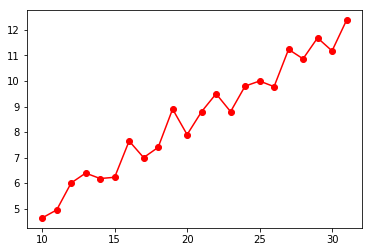

In [135]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

### Fitting a line to the points

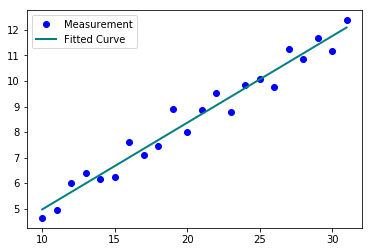

In [47]:
def func(x, a,b):
    return a*(x) + b

popt, pcov = curve_fit(func, pnts_n, pnts_t,maxfev=100000)

x = pnts_n
y = pnts_t
plt.figure()
plt.plot(x, y, 'bo', label="Measurement")
xx = np.linspace(pnts_n[0],pnts_n[-1],50)
plt.plot(xx, func(xx, *popt), 'r-', linewidth=2, color='teal', label="Fitted Curve")
plt.legend(loc='best')
plt.show()

## Discussion

simulated annealing exhibits linear running time, but with a big constant factor.


### Comparing Greedy and Simulated-annealing meta-heuristic

**Comparing the approximations produced by the greedy aglorithm and the meta-heuristic on the same random graph**
**averaging over multiple instances**

In [23]:
def ratio_fictitious(G,soln):
    #returns the ratio of the count of original edges to the count of fictitious edges in a solution
    cost=evaluate_cost(G,soln)
    fictitious_count= (cost-len(G))/4
    return 1-fictitious_count/len(G)

In [52]:
pnts_greedy = []
pnts_sa = []

def test_Approximation():
    print( "n\tGreedy\tSA" )
    max_repeats = 10
    n = 10
    for n in range(10,25):
        temp_greedy=[]
        temp_sa=[]
        for repeats in range(max_repeats):
            G=random_graph(n,0.2)
            add_hamiltonian_cycle(G)
            complete_fictitious(G)
            
            temp_greedy.append(ratio_fictitious(G, min_greedy_tour(G)[0]))
            temp_sa.append( ratio_fictitious(G, simulated_annealing(G) ) )

        pnts_greedy.append(sum(temp_greedy)/max_repeats)
        pnts_sa.append(sum(temp_sa)/max_repeats)
        print (str(n)+'\t %.3f'%(pnts_greedy[n-10]) +'\t %.3f' %(pnts_sa[n-10]))

test_Approximation()

n	Greedy	SA
10	 0.890	 1.000
11	 0.855	 1.000
12	 0.892	 1.000
13	 0.900	 1.000
14	 0.857	 0.957
15	 0.867	 0.973
16	 0.869	 0.956
17	 0.876	 0.941
18	 0.878	 0.978
19	 0.905	 0.947
20	 0.915	 0.960
21	 0.910	 0.938
22	 0.905	 0.941
23	 0.917	 0.939
24	 0.917	 0.954


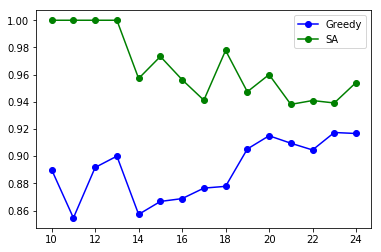

In [53]:
plt.figure()
p1 = plt.plot([i for i in range(10,25)], pnts_greedy, 'bo-', label="Greedy")
p3 = plt.plot([i for i in range(10,25)], pnts_sa, 'go-', label="SA")
plt.legend(loc='best')
plt.show()

## Discussion

Simulated annealing gives better approximations than greedy algorithm for all tested cases, and even succeeds in finding the Hamiltonian cycle in smaller instances.

Greedy algorithm gradually gives better approximations as n grows larger.

## 1. **Corollary 5.6.3:**
**(Bang-jensen and Gutin: 241)**

Let $G$ be a digraph of order $n$. If the minimum semi-degree (out-degree and in-degree) of (D) ≥ n/2, then D is hamiltonian


The algorithm costs: $$O(n).$$

In [1]:
def corollary_1(G):
    #find minimal in-degree of G and minimal out-degree of G
    #choosing an initial large values
    min_in_degree=1000
    min_out_degree=1000
    for i in range(len(G)):
        if G.in_degree(i)<min_in_degree:
            min_in_degree=G.in_degree(i)
        if G.out_degree(i)<min_out_degree:
            min_out_degree=G.out_degree(i)
    sufficient_condition=len(G)/2
    if min_in_degree>=sufficient_condition and min_out_degree>=sufficient_condition:
        return True
    else:
        return 'undetermined'
    

In [95]:
corollary_1(G)

True

## 2. Corollary 5.6.2 **(Ghouila-Houri):**
If the degree of every vertex in a strong digraph $D$ of order $n$ is at least $n$, then $D$ is hamiltonian
(Bang-jensen and Gutin: 241)

The algorithm costs: $$O(n).$$

In [96]:
def ghouila_houri(G):
    #find minimal in-degree of G and minimal out-degree of G
    #choosing an initial large values
    min_degree=1000
    for i in range(len(G)):
        if G.degree(i)<min_degree:
            min_degree=G.degree(i)
    sufficient_condition=len(G)
    if min_degree>=sufficient_condition:
        return True
    else:
        return 'undetermined'
    

## 3. **Meyniel’s theorem**
Let $D$ be a strong digraph of
order $n ≥ 2$. If $d(x) + d(y) ≥ 2n − 1$ for all pairs of non-adjacent vertices in
$D$, then $D$ is hamiltonian.

(Bang-jensen and Gutin: 242)

The algorithm costs: $$O(n^2).$$

In [84]:
def Meyniel(G):
    for i in range(len(G)):
        for j in range(len(G)):
            #self-loops not allowed
            if i!=j:
                #making sure they're not adjacent
                if j not in list(G.neighbors(i)):
                    if G.degree(i)+G.degree(j)<(2*len(G)-1):
                        return 'undetermined'
    return True

In [126]:
Meyniel(G)

True

## 4. Corollary 5.6.6##
**(Bang-jensen and Gutin: 242)**

Let $D$ be a digraph of order $n ≥ 2$. $If$ $d^+(x) + d^−(y) ≥ n$
for all pairs of vertices $x$ and $y$ such that there is no arc from $x$ to $y$, then $D$ is hamiltonian.

The algorithm costs: $$O(n^2)$$.

In [86]:
def corollary_2(G):
    for i in range(len(G)):
        for j in range(len(G)):
            #self-loops not allowed
            if i!=j:
                #making sure they're not adjacent
                if (j not in list(G.neighbors(i))):
                    if G.out_degree(i)+G.in_degree(j)<(len(G)):
                        return 'undetermined'
    return True

In [125]:
corollary_2(random_graph(30,0.6))

'undetermined'

## 5. Theorem 5.6.11 (Manoussakis)
**(Bang-jensen and Gutin: 242)**

Suppose that $D$ satisfies the following condition for every triple $x, y, z ∈ V (D)$ such that $x$ and $y$ are non-adjacent:

If there is no arc from $x$ to $z$, then $d(x) + d(y) + d^+(x) + d^−(z) ≥ 3n − 2$.

If there is no arc from $z$ to $x$ then $d(x) + d(y) + d^−(x) + d^+(z) ≥ 3n − 2$.

Then $D$ is **Hamiltonian**.

The algorithm costs: $$O(n^3).$$

In [89]:
def manoussakis(G):
    for x in range(len(G)):
        for y in range(len(G)):
            #self-loops not allowed
            if x!=y:
                #making sure they're not adjacent
                if (x not in list(G.neighbors(y))) and (y not in list(G.neighbors(x))):
                    for z in range(len(G)):
                        #making sure they're not the same node
                        if z!=x and z!=y:
                            # if there's no arc from x to z
                            if z not in list(G.neighbors(x)):
                                #checking if the condition holds and returns false if it doesnt
                                test=G.degree(x)+G.degree(y)+G.out_degree(x)+G.in_degree(z)
                                #3n-2
                                test_against=3*len(G)-2
                                if test<test_against:
                                    return 'undetermined'
                            if x not in list(G.neighbors(z)):
                                #checking if the condition holds and returns false if it doesnt
                                test=G.degree(x)+G.degree(y)+G.in_degree(x)+G.out_degree(z)
                                #3n-2
                                test_against=3*len(G)-2
                                if test<test_against:
                                    return 'undetermined'

    return True

In [124]:
manoussakis(random_graph(30,.7))

True

# Conclusion

* Exhaustive search becomes impractical at larger graph sizes, but useful when $n$ is small.
* Greedy algorithm gives approximations that are around 90% in the cases we tested.
* Simulated annealing achieves better approximation results than the greedy algorithm, and has better asymptotic complexity.
* If instance is a special case, then it can be decided in polynomial time.
* There seems to be a relationship between high values of edge existence probability $p$ and the graph belonging to one of the special cases described.

# Reflection

* I learned about the theory of NP-Completeness, and that all the problems that are proven to be NP-Complete are reducible into each other.
* I learned that Depth-First-Search is useful in detecting cycles.
* I learned alot about Graph-theortic concepts.
* learned about the G(n,p) model for generating unbiased random graphs.
* gained practice with graph representing and plotting libraries in python.
* learned about greedy algorith for the **TSP**
* learned about meta-heuristics and simulated annealing and other nature-inspired algorithms.
* things I would've done differently:
 1. Trying different values of $p$ instead of keeping it constant
 2. used a greedy algorithm that used the vertex degree.
 3. used a different meta-heuristic

# References

* Fournier, JC. (2010)
**Graph Theory and Applications: With Exercises and Problems.**
ISTE
		

* Garey, S. and Johnson, D. (1979)
**Computers and Intractability: A Guide to the Theory of NP-Completeness.**
Freeman


* Erdos, P. and Renyi, A. (1959).
** On Random Graphs. I.**
Publicationes Mathematicae. 6: 290–297.


* Nilsson, C. (2003).
** Heuristics for the Traveling Salesman Problem.**


* Brownlee, J. (2011)
**Clever Algorithms.** Lulu


* Bang-Jensen, J. and Gutin, G. (2007)
**Digraphs: Theory, Algorithms and Applications.** Springer